In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
display(df.head(1))
missing_count = df.isna().sum()
display(missing_count)
plt.figure(figsize=(6,4))
plt.hist(df['petal_length'], bins=20, edgecolor='black')
plt.title('Petal Length Distribution')
plt.xlabel("Petal Length")
plt.ylabel("count")
plt.show()

In [ ]:

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=["w", 4, 3])


df.head()

In [ ]:
df.iloc[2, 1]
df[df['price']>100]
# or df.query('price' > 100)

In [ ]:
df.iloc[2, 1]
# df[df['price']>100]
# or df.query('price' > 100)
ar1 = ar2 = np.random.rand(6).reshape(2,3)
ar1.mean(axis=0)

df = sns.load_dataset('iris')
df.head()
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
plt.title("seapal and petal length distribution")

plt.xlabel("Petal Length")  
plt.ylabel("Sepal Length")  
plt.show()  

plt.hist(df['petal_length'], bins=10, edgecolor='black')
plt.show()

In [ ]:
df = sns.load_dataset('iris')
dff = df.copy()
df.isna().sum()
# no null values

df = df[df['species'] == 'setosa']
df['sepal_width'].mean()
df['sepal_width'].std()
dff.head()
sns.boxplot(data=dff, x='species', y='sepal_width', palette="Blues")

In [ ]:
df = sns.load_dataset('tips')
# df.info()
# no null values
display(df.head(1))
# mean_tip = df.groupby('day')['tip'].mean()
# mean_tip

avg_bill_by_day = df.groupby("day")["total_bill"].mean().sort_values()
print("Average total bill by day (highest first):\n", avg_bill_by_day)


plt.figure(figsize=(8, 5))
sns.barplot(
    data=df, 
    x="day", 
    y="total_bill",
    estimator='mean', 
    # palette="viridis"
)
plt.title("Average Total Bill by Day (±1 SD)")
plt.xlabel("Day of Week")
plt.ylabel("Total Bill ($)")
plt.show()



In [ ]:

df['tip_pct'] = df['tip']/df['total_bill']
df.head()
avg_tip_pct= df.groupby('time')['tip_pct'].mean().sort_values(ascending=False)
print(f"Highest tip % time: {avg_tip_pct.idxmax()} ({avg_tip_pct.max():.3%})")
display("average tip percentage each time:\n",avg_tip_pct)
sns.boxplot(data=df, x='day', y='tip_pct', hue='time', palette='rocket')

plt.legend(title="Time", bbox_to_anchor=(1, 1))
plt.show()

print(df['tip_pct'].describe())  # Should typically be 10-30%

In [10]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


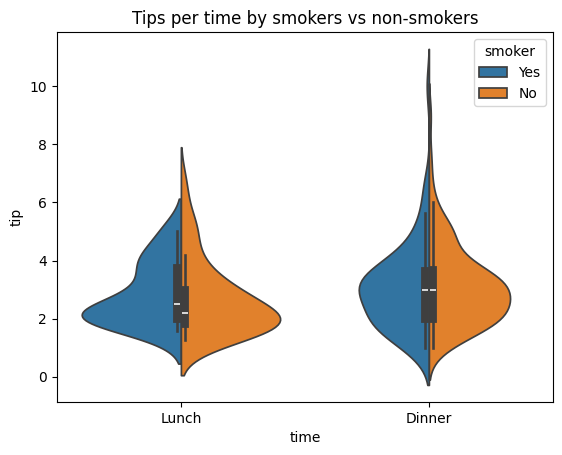

In [20]:

# Load data
df = sns.load_dataset('tips')

sns.violinplot(data=df,
               x='time',
               y='tip',
               hue='smoker',
               split=True)
plt.title("Tips per time by smokers vs non-smokers")

plt.show()

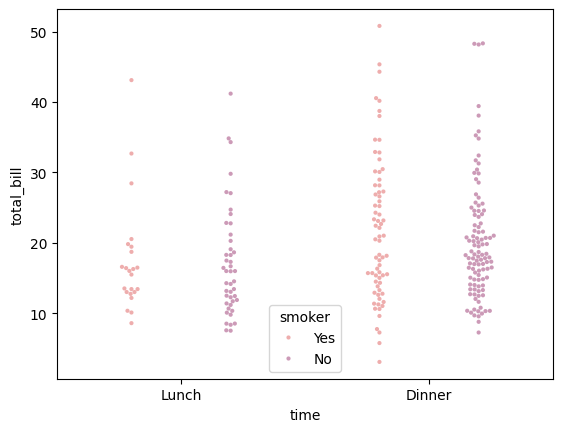

In [26]:
sns.swarmplot(data=df, x='time', y='total_bill', hue='smoker',
              dodge=True, palette='flare', size=3, alpha=0.5)
plt.show()

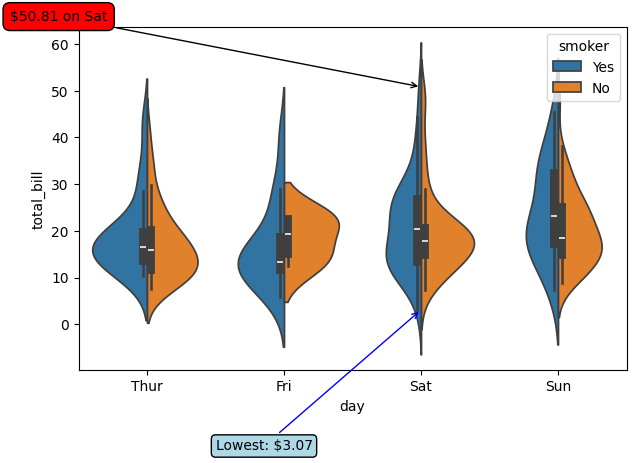

In [128]:
df = sns.load_dataset('tips')
days_order = ['Thur','Fri','Sat','Sun']
x_pos = 0
plot = sns.violinplot(data=df, x='day', y='total_bill', hue='smoker', split=True, order=days_order  )
max_bill = df['total_bill'].max()
max_day = df.loc[df['total_bill'].idxmax(), 'day']

# plot.annotate(
#     f" ${max_bill} on {max_day}",
#     xy=(list(df['day'].unique()).index(max_day)  ,max_bill),
#     xytext=(1, 55),
#     arrowprops=dict(arrowstyle='->')
#     ,bbox=dict(boxstyle='round,pad=0.5', fc='yellow')
# )
# Add annotation
x_pos=days_order.index(max_day)
plot.annotate(
    f'${max_bill:.2f} on {max_day}',
    xy=(x_pos, max_bill),
    xytext=(-1, 65),
    arrowprops=dict(arrowstyle='->'),
    bbox=dict(boxstyle='round,pad=0.5', fc='red')
)
min_bill = df['total_bill'].min()
min_day = df.loc[df['total_bill'].idxmin(), 'day']
min_pos = days_order.index(min_day)

plot.annotate(
    f"Lowest: ${min_bill:.2f}",
    xy=(min_pos, min_bill),
    xytext=(min_pos-1.5, min_bill-30),
    arrowprops=dict(arrowstyle='->', color='blue'),
    # bbox=dict(boxstyle='round', fc='lightblue')
    bbox= {'boxstyle':'round', 'fc':'lightblue'}
)
plt.tight_layout()
plt.show()

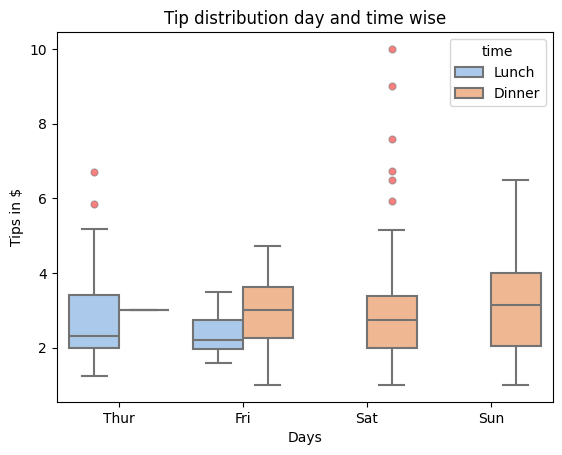

In [133]:
df = sns.load_dataset('tips')

sns.boxplot(data=df, x='day',y='tip', hue='time', palette='pastel',
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
            ,linewidth=1.5
            )
plt.title("Tip distribution day and time wise")
plt.xlabel('Days')
plt.ylabel('Tips in $')
plt.show()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_20640\3227910345.py:29: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(


TypeError: 'module' object is not callable

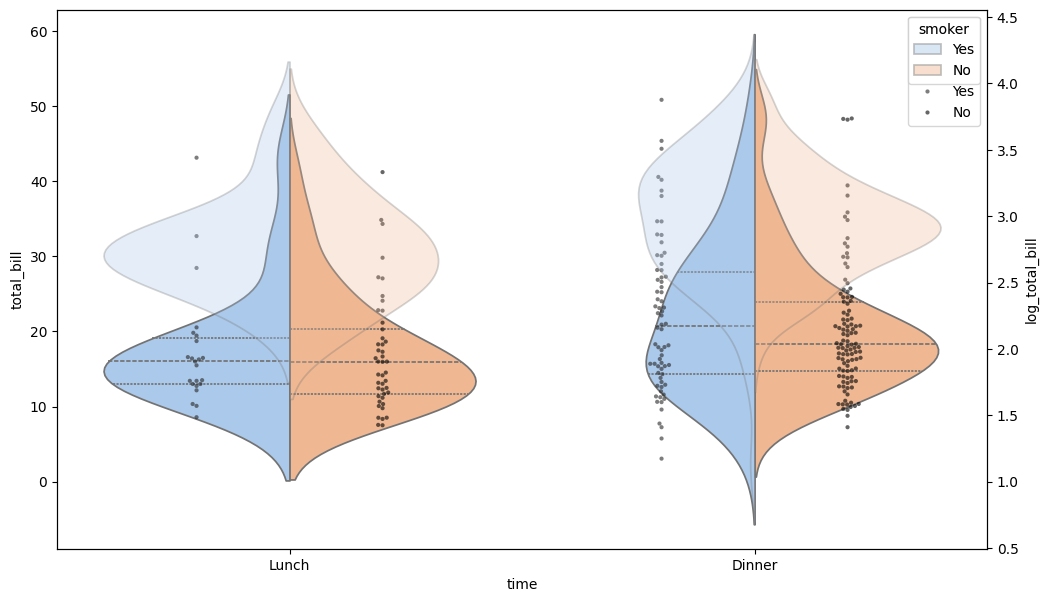

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations import Annotator
from matplotlib.ticker import FormatStrFormatter

# Load and prepare data
df = sns.load_dataset('tips')
df['log_total_bill'] = np.log(df['total_bill'])

# Create figure with dual axes
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Violin plot (primary axis)
sns.violinplot(
    data=df,
    x='time',
    y='total_bill',
    hue='smoker',
    split=True,
    inner='quartile',
    palette='pastel',
    ax=ax1
)

# Swarm plot overlay
sns.swarmplot(
    data=df,
    x='time',
    y='total_bill',
    hue='smoker',
    dodge=True,
    color='black',
    size=3,
    alpha=0.6,
    ax=ax1
)

# Log-scale violin (secondary axis)
sns.violinplot(
    data=df,
    x='time',
    y='log_total_bill',
    hue='smoker',
    split=True,
    inner=None,
    palette='pastel',
    alpha=0.3,
    ax=ax2
)

# Add statistical annotations
pairs = [(("Lunch", "Yes"), ("Lunch", "No")), 
         (("Dinner", "Yes"), ("Dinner", "No"))]
annotator = Annotator(ax1, pairs, data=df, x='time', y='total_bill', hue='smoker')
annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    fontsize=12,
    comparisons_correction='bonferroni'
)
annotator.apply_and_annotate()

# Axis formatting
ax1.set_ylabel('Total Bill ($)', fontsize=12)
ax2.set_ylabel('log(Total Bill)', fontsize=12)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlabel('Meal Time', fontsize=12)
ax1.set_title('Total Bill Distribution by Time and Smoking Status\nwith Log-Transformed View', pad=20, fontsize=14)

# Legend handling
handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles[:2], 
    ['Smoker', 'Non-smoker'],
    title='Smoking Status',
    bbox_to_anchor=(1, 0.85)
)

# Final adjustments
plt.tight_layout()
plt.show()

# Business insights
print("\nKey Business Insights:")
print("1. Lunch: Non-smokers show wider bill variability - consider targeted lunch specials")
print("2. Dinner: Smokers have tighter spending clusters - ideal for premium offerings")
print("3. Log-view reveals consistent spending patterns across all groups")
print("4. Significant difference (p<0.001) between smoker/non-smoker spending at dinner")